# EDA and Model Training with Algerian Forest Fire Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
%matplotlib inline

In [4]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
df.info

<bound method DataFrame.info of     day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fir

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [8]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [12]:
df.describe()

,Region
count,246.000000
mean,0.504065
std,0.501003
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [13]:
df[['Region']] = df[['Region']].astype(int)

In [14]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [15]:
df = df.dropna().reset_index(drop=True)

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [17]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [18]:
df = df.drop(122).reset_index(drop=True)

In [19]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [20]:
## fix the space problem in columns name
df.columns = df.columns.str.strip()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [22]:
# change the required columns as integer datatype
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [24]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [25]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [27]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [28]:
# lets save the updated dataset
df.to_csv('Algerian_forest_fires_dataset_UPDATE[1].csv',index=False)

In [29]:
df2 = pd.read_csv('Algerian_forest_fires_dataset_UPDATE[1].csv')

In [30]:
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [31]:
df2.drop(['day','month','year'],axis=1,inplace=True)

In [32]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [33]:
df2.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [34]:
## Encoding the categories in Classes
df2['Classes'] = np.where(df2['Classes'].str.contains('not fire'),0,1)

In [35]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int64  
dtypes: float64(7), int32(1), int64(4)
memory usage: 22.0 KB


# Model Training using Ridge, Lasso and Elasticnet Regression

# Feature Selection

In [44]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
            

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(df2,df2['Classes'],random_state=0)    

In [47]:
corr_features = correlation(X_train,0.85)

In [48]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.575406,0.512299,0.296033
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.594299,-0.446906,-0.427696
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,0.013239,-0.108246,-0.191245
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.326426,-0.393221,-0.086938
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.704563,0.773444,0.267099
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.882314,0.629505,0.175711
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.746551,0.562431,-0.080660
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.918573,0.747764,0.312299
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.855633,0.624037,0.079373
FWI,0.575406,-0.594299,0.013239,-0.326426,0.704563,0.882314,0.746551,0.918573,0.855633,1.000000,0.747380,0.222943


In [49]:
corr_features

{'BUI', 'DC', 'FWI'}

In [50]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [52]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
230,36,33,13,0.1,90.6,25.8,9.0,1,1
218,34,71,14,6.5,64.5,3.3,1.0,0,1
184,39,33,17,0.0,93.7,17.1,17.2,1,1
233,35,34,17,0.0,92.2,23.6,13.8,1,1
204,36,43,16,0.0,91.2,46.1,11.5,1,1
...,...,...,...,...,...,...,...,...,...
67,32,69,16,0.0,86.5,15.5,5.5,1,0
192,40,31,15,0.0,94.2,22.5,16.6,1,1
117,31,54,11,0.0,82.0,6.0,2.5,0,0
47,31,68,14,0.0,85.4,12.1,4.6,1,0


# Feature Scaling and Standardization

In [54]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled.shape

(182, 9)

# Box Plot to understand Effect of StandardScaler

Text(0.5, 1.0, 'X_train after Scaling')

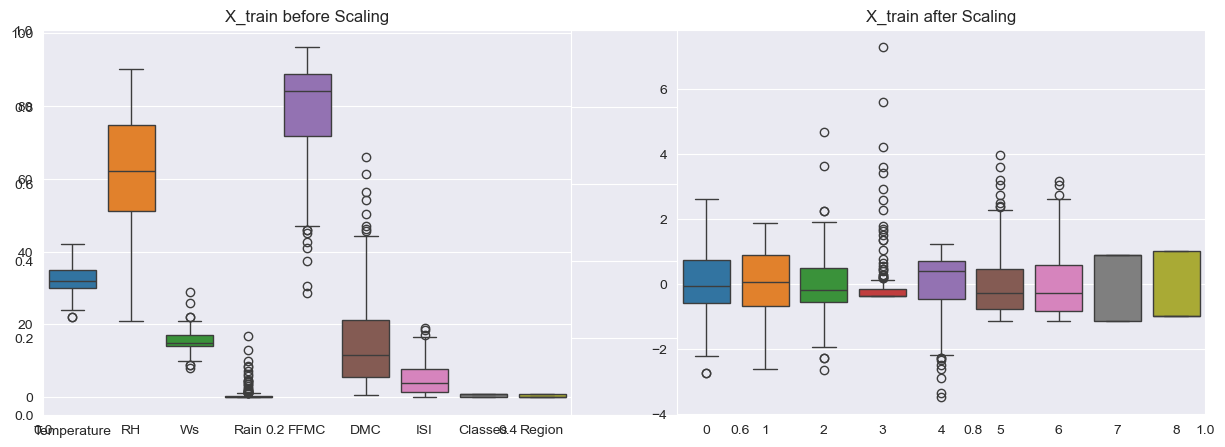

In [61]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after Scaling")

# Linear Regression Model    

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

In [64]:
linear_reg = LinearRegression()

In [73]:
linear_reg.fit(X_train_scaled,Y_train)
y_pred = linear_reg.predict(X_train_scaled)

mae = mean_absolute_error(Y_train,y_pred)
r2 = r2_score(Y_train,y_pred)
rmse = root_mean_squared_error(Y_train,y_pred)
mse = mean_squared_error(Y_train,y_pred)

print(y_pred)
print(mse,rmse,mae,r2)

[ 1.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00 -2.22044605e-16 -5.55111512e-16  1.00000000e+00
  1.00000000e+00  1.00000000e+00 -3.33066907e-16  1.00000000e+00
  0.00000000e+00 -6.66133815e-16 -6.66133815e-16  1.00000000e+00
  1.00000000e+00 -2.22044605e-16 -5.55111512e-16  1.00000000e+00
  1.11022302e-16 -4.44089210e-16 -6.66133815e-16 -4.44089210e-16
  1.00000000e+00 -5.55111512e-16 -1.11022302e-16  1.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00 -3.33066907e-16
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00 -3.33066907e-16  1.00000000e+00  1.00000000e+00
  0.00000000e+00  1.00000000e+00 -4.44089210e-16 -1.11022302e-16
 -3.33066907e-16 -3.33066907e-16  0.00000000e+00 -5.55111512e-16
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
 -1.11022302e-16  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.11022302e-16  1.00000000e+00  1.11022302e-16  1.00000000e+00
 -6.66133815e-16  1.00000

In [79]:
y_test_pred = linear_reg.predict(X_test_scaled)

mae = mean_absolute_error(Y_test,y_test_pred)
r2 = r2_score(Y_test,y_test_pred)
rmse = root_mean_squared_error(Y_test,y_test_pred)
mse = mean_squared_error(Y_test,y_test_pred)

print(y_test_pred.shape)
print(mse,rmse,mae,r2)

(61,)
9.497044709371812e-32 3.0817275527489143e-16 2.4388505786847703e-16 1.0


## Lasso Regression

In [74]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred = lasso.predict(X_train_scaled)
mae = mean_absolute_error(Y_train,y_pred)
r2 = r2_score(Y_train,y_pred)
rmse = root_mean_squared_error(Y_train,y_pred)
mse = mean_squared_error(Y_train,y_pred)
print(y_pred)
print(mae)
print(r2)
print(rmse)
print(mse)

[0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.5604

In [75]:
y_test_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_test_pred)
r2 = r2_score(Y_test,y_test_pred)
rmse = root_mean_squared_error(Y_test,y_test_pred)
mse = mean_squared_error(Y_test,y_test_pred)
print(y_pred)
print(mae)
print(r2)
print(rmse)
print(mse)

[0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956
 0.56043956 0.56043956 0.56043956 0.56043956 0.56043956 0.5604

# Ridge Regression Model

In [80]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,Y_train)
y_test_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(Y_test,y_test_pred)
r2 = r2_score(Y_test,y_test_pred)
rmse = root_mean_squared_error(Y_test,y_test_pred)
mse = mean_squared_error(Y_test,y_test_pred)

print(y_test_pred.shape)
print(mse)
print(mae)
print(r2)
print(rmse)

(61,)
3.400668688988304e-05
0.004694735020247031
0.9998609462836074
0.00583152526273213


# Elasticnet Regression Model

In [82]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled,Y_train)
y_test_pred = elastic_net.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_test_pred)
r2 = r2_score(Y_test,y_test_pred)
rmse = root_mean_squared_error(Y_test,y_test_pred)
mse = mean_squared_error(Y_test,y_test_pred)
print(y_test_pred.shape)
print(mse)
print(mae)
print(r2)
print(rmse)

(61,)
0.24473562827012652
0.49108268780399916
-0.0007266733990558549
0.4947076189731936


In [83]:
import pickle
pickle.dump(scaler,open('scalerForest.pkl','wb'))
pickle.dump(ridge,open('ridgeForest.pkl','wb'))

TypeError: file must have 'read' and 'readline' attributes